In [1]:
%pylab inline
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

tf.compat.v1.disable_eager_execution()

img_height=128
img_width=416
ckpt_file = '../../Check/model-18635.meta'
I = pil.open('../../SfMLearnerData/2011_09_26_drive_0001_sync_02/0000000106.jpg')
I = I.crop((0,0,img_width,img_height))
I = np.array(I)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [3]:
saver = tf.compat.v1.train.Saver([var for var in tf.compat.v1.model_variables()]) 
with tf.compat.v1.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

INFO:tensorflow:Restoring parameters from ../CheckBase/model.latest


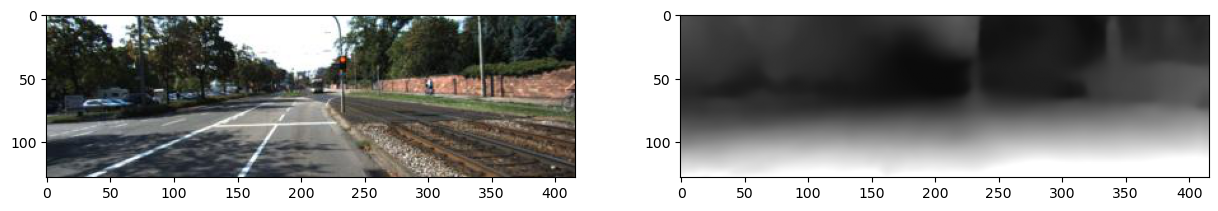

In [4]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))

In [4]:
%pylab inline
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

# Disable eager execution to use TensorFlow 1.x functionality
tf.compat.v1.disable_eager_execution()

img_height = 128
img_width = 416
ckpt_file = '../../Check/model-18635.meta'
I = pil.open('../../SfMLearnerData/2011_09_26_drive_0001_sync_02/0000000106.jpg')
I = I.crop((0, 0, img_width, img_height))
I = np.array(I)

sfm = SfMLearner()
sfm.setup_inference(img_height, img_width, mode='depth')

# Start a TensorFlow session using the compatible v1 API
with tf.compat.v1.Session() as sess:
    # Assuming you have a method in SfMLearner to restore the checkpoint
    saver = tf.compat.v1.train.import_meta_graph(ckpt_file)
    saver.restore(sess, tf.train.latest_checkpoint('../../Check/'))

    # Assuming you have a method to run the inference
    predictions = sfm.infer(I, sess)

    # Further code to handle predictions
saver = tf.compat.v1.train.Saver([var for var in tf.compat.v1.model_variables()]) 
with tf.compat.v1.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


AttributeError: module 'tensorflow' has no attribute 'placeholder'